In [1]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import anderson
from scipy.stats import normaltest
from scipy.stats import norm
from scipy.stats import skew
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats
import re
import warnings
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from wordcloud import WordCloud, STOPWORDS 
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("3.txt")

df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.shape

(205, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
#Dropping car_ID and symboling columns

df = df.drop('car_ID', 1)
df = df.drop('symboling', 1)

In [6]:
#check null values

df.isnull().sum()

CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# Exploratory data analysis

<AxesSubplot:xlabel='price'>

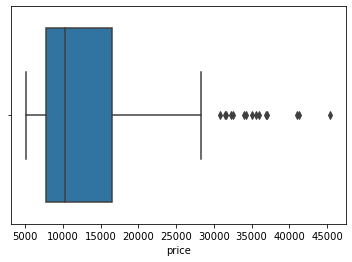

In [7]:
sns.boxplot(x=df['price'])


It looks like there are some outliers. 
Let's use z-score to check which obsrvation we can call 'outlier'. The data with z-score > 3 or < -3 should be considered as outliers:



In [8]:
z_score = stats.zscore(df['price'])
outlier = df[np.abs(z_score) > 3]
print(outlier)

                            CarName fueltype aspiration doornumber  carbody  \
16                           bmw x5      gas        std        two    sedan   
73            buick century special      gas        std       four    sedan   
74  buick regal sport coupe (turbo)      gas        std        two  hardtop   

   drivewheel enginelocation  wheelbase  carlength  carwidth  ...  enginesize  \
16        rwd          front      103.5      193.8      67.9  ...         209   
73        rwd          front      120.9      208.1      71.7  ...         308   
74        rwd          front      112.0      199.2      72.0  ...         304   

    fuelsystem boreratio stroke  compressionratio horsepower  peakrpm  \
16        mpfi      3.62   3.39               8.0        182     5400   
73        mpfi      3.80   3.35               8.0        184     4500   
74        mpfi      3.80   3.35               8.0        184     4500   

    citympg  highwaympg    price  
16       16          22  41315

We have some outliers. Maybe we would need to remove it

<AxesSubplot:xlabel='price', ylabel='Density'>

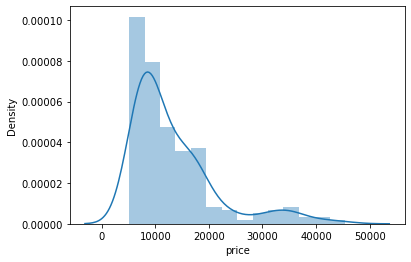

In [9]:
sns.distplot(df['price'])

The plot above shows that the distribution is skewed, so we will apply log-transformation

<AxesSubplot:xlabel='price', ylabel='Density'>

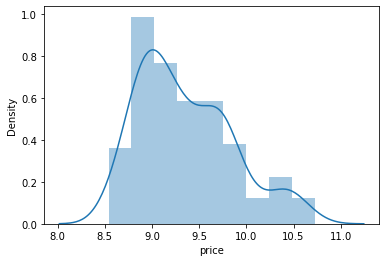

In [10]:
#apply log-transformation
df['price'] = np.log1p(df['price'])

sns.distplot(df['price'])

Now the distribution looks much more normal.

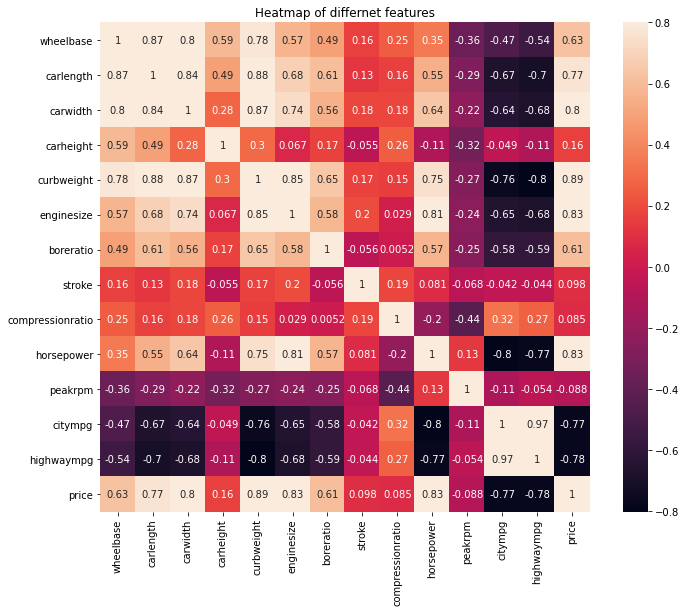

In [11]:
#correlation matrix
corrmat = df.corr()

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, annot_kws={'size': 10}, annot = True, square=True).set(title='Heatmap of differnet features');

Observation
-----------------

We can see that many features have strong positive correlation with each other.


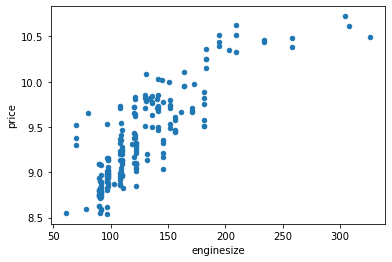

In [12]:
df.plot.scatter(x='enginesize', y='price');


Looking at the plot above we can see strong relashionship between variables.



### PCA

In [13]:
pca_columns = ["enginesize", "curbweight", "horsepower", 
               "carwidth", "carlength", "wheelbase", 
               "boreratio", "citympg", "highwaympg"]
pca_columns
data_pca = df[pca_columns]
#data_train.head()
#standardizing data
StandardScaler().fit_transform(data_pca)
data_pca.head()

,enginesize,curbweight,horsepower,carwidth,carlength,wheelbase,boreratio,citympg,highwaympg
0,130,2548,111,64.1,168.8,88.6,3.47,21,27
1,130,2548,111,64.1,168.8,88.6,3.47,21,27
2,152,2823,154,65.5,171.2,94.5,2.68,19,26
3,109,2337,102,66.2,176.6,99.8,3.19,24,30
4,136,2824,115,66.4,176.6,99.4,3.19,18,22


In [14]:
#PCA

from sklearn.decomposition import PCA
pca_train = PCA(n_components=2)
principal_components = pca_train.fit_transform(data_pca)
pca_train.explained_variance_ratio_

array([0.99548045, 0.00323041])

In [15]:
principal_data = pd.DataFrame(data = principal_components, columns = ['pca_1', 'pca_2'])
principal_data.head()

,pca_1,pca_2
0,-7.057267,9.466968
1,-7.057267,9.466968
2,270.841223,33.378201
3,-218.880370,6.379076
4,268.738449,-7.936346


Observation
-----------------

PCA allows us to reduce the dimension of variables which were correlated to price and to each other.

AxesSubplot(0.125,0.125;0.775x0.755)


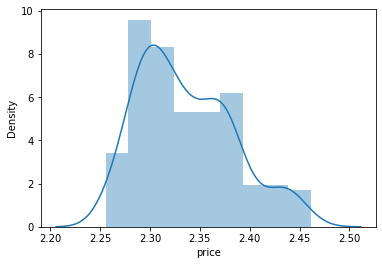

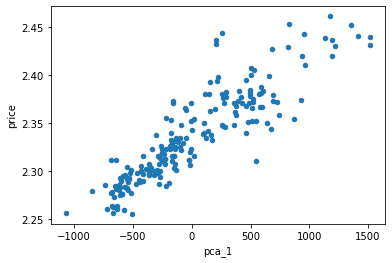

In [16]:
df['price'] = np.log1p(df['price'])
print(sns.distplot(df['price']))

principal_data['price'] = df['price']
principal_data.head()
principal_data.plot.scatter(x='pca_1', y='price');

Observation
-----------------

We can see few outliers in the data but still we will keep it for the further use.

<AxesSubplot:xlabel='pca_1', ylabel='Density'>

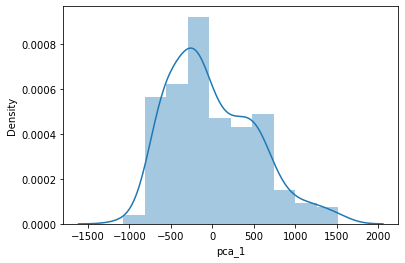

In [17]:
sns.distplot(principal_data['pca_1'])


Observation
-----------------
The rest of numeric variables don't have linear relationship with car price, but how knows may be they have non-linear relatioship with the price? Let's take a look at their plots.



In [18]:
#remove numeric variables which we already used in PCA
data_rest = df._get_numeric_data()
data_rest.drop(pca_columns, axis=1, inplace = True)
data_rest.head()

,carheight,stroke,compressionratio,peakrpm,price
0,48.8,2.68,9.0,5000,2.352341
1,48.8,2.68,9.0,5000,2.371288
2,52.4,3.47,9.0,5000,2.371288
3,54.3,3.40,10.0,5500,2.355491
4,54.3,3.40,8.0,5500,2.376500


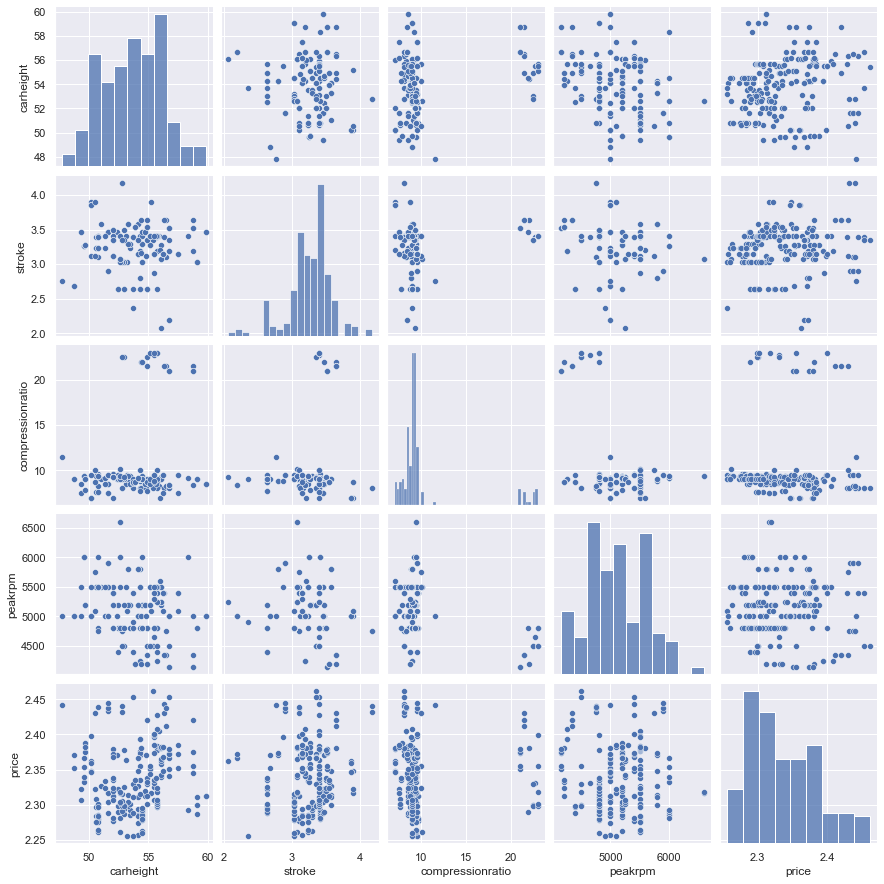

In [19]:
#scatterplot
sns.set()
sns.pairplot(data_rest, size = 2.5)
plt.show()

Observation
-----------------
There is no such a relationship between all the variables and the price variable.

In [20]:
dummy_data = df.select_dtypes(include=['object'])
dummy_data = dummy_data.drop('CarName', 1)
dummy_data.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [21]:
dummy_data = pd.get_dummies(dummy_data)
dummy_data.shape

(205, 38)

In [22]:
dummy_data = pd.concat([df['price'], dummy_data], axis=1)


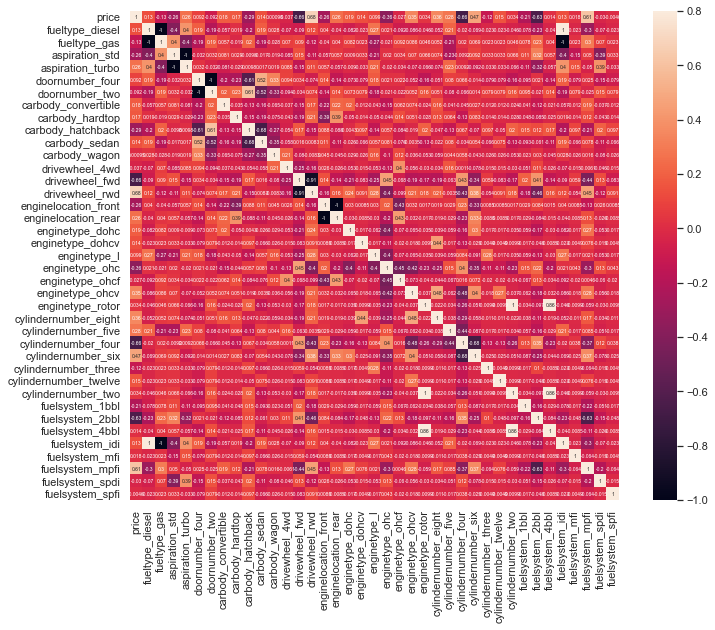

In [23]:
corrmat_dummy = dummy_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat_dummy, vmax=.8, annot_kws={'size': 5}, annot = True, square=True);

Observation
-----------
It is hard to get any idea from the above plot.

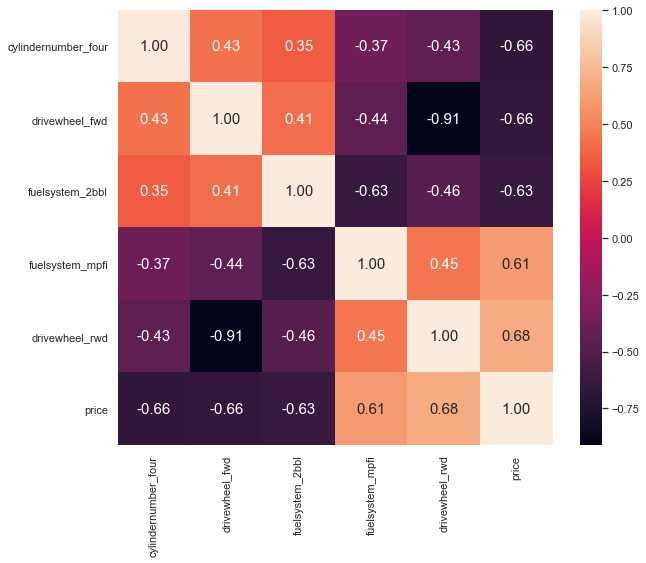

In [24]:
positive_corr = corrmat_dummy.sort_values('price', )[corrmat_dummy['price']>0.5]['price']
negatie_corr =  corrmat_dummy.sort_values('price', )[corrmat_dummy['price']<-0.5]['price']
correlated_dummy_cols = pd.concat([negatie_corr,positive_corr], axis=0).index
cm = np.corrcoef(dummy_data[correlated_dummy_cols].values.T)
f, ax = plt.subplots(figsize=(10, 8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, 
                 yticklabels=correlated_dummy_cols.values, xticklabels=correlated_dummy_cols.values)
plt.show()

Observation
-----------------
It looks like few variables and the price have strong linear relationship.


<AxesSubplot:xlabel='drivewheel_rwd', ylabel='price'>

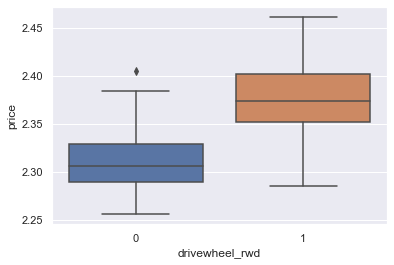

In [25]:
Observationsns.boxplot(x='drivewheel_rwd', y="price", data = dummy_data)


In [26]:
correlated_dummy_cols = correlated_dummy_cols.drop('drivewheel_fwd')


In [27]:

final_data = dummy_data[correlated_dummy_cols]
final_data.head()


,cylindernumber_four,fuelsystem_2bbl,fuelsystem_mpfi,drivewheel_rwd,price
0,1,0,1,1,2.352341
1,1,0,1,1,2.371288
2,0,0,1,1,2.371288
3,1,0,1,0,2.355491
4,0,0,1,0,2.376500


##  Linear Regression without PCA


In [29]:
pred = final_data['price']
data = final_data.drop(['price'], axis=1)

In [31]:
import sklearn.model_selection as model_selection


X_train,X_test, y_train, y_test = model_selection.train_test_split(data, pred,train_size=0.8,test_size=0.2,random_state=42)
    

In [32]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((164, 4), (41, 4), (164,), (41,))

In [33]:
from sklearn.metrics import r2_score

def adjusted_r2(r2_score, n, p):
    len_score = (n-1)/(n-p-1)
    score = (1 - r2_score) * len_score
    return 1- score

In [34]:
from sklearn.linear_model import LinearRegression

LR1 = LinearRegression()
LR1.fit(X_train,y_train)

print(LR1.intercept_)
print(LR1.coef_)



2.3571884979278037
[-0.0426978  -0.02435599  0.01754407  0.03185343]


In [36]:
pred = LR1.predict(X_test)

print(r2_score(y_test,pred))

0.7082321088094314


In [38]:
print(adjusted_r2(r2_score(y_test,pred), len(y_test), len(X_test.columns)))

0.6758134542327016


##  Linear Regression with PCA


In [39]:
final_data2 = pd.concat([principal_data['pca_1'], dummy_data[correlated_dummy_cols]], axis=1)
final_data2.head()

,pca_1,cylindernumber_four,fuelsystem_2bbl,fuelsystem_mpfi,drivewheel_rwd,price
0,-7.057267,1,0,1,1,2.352341
1,-7.057267,1,0,1,1,2.371288
2,270.841223,0,0,1,1,2.371288
3,-218.880370,1,0,1,0,2.355491
4,268.738449,0,0,1,0,2.376500


In [40]:
pred = final_data2['price']
data = final_data2.drop(['price'], axis=1)

In [41]:
import sklearn.model_selection as model_selection


X_train,X_test, y_train, y_test = model_selection.train_test_split(data, pred,train_size=0.8,test_size=0.2,random_state=42)
    

In [42]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((164, 5), (41, 5), (164,), (41,))

In [43]:
from sklearn.metrics import r2_score

def adjusted_r2(r2_score, n, p):
    len_score = (n-1)/(n-p-1)
    score = (1 - r2_score) * len_score
    return 1- score

In [44]:
from sklearn.linear_model import LinearRegression

LR2 = LinearRegression()
LR2.fit(X_train,y_train)

print(LR2.intercept_)
print(LR2.coef_)



2.3495554474961526
[ 5.17781714e-05 -2.42571284e-02 -1.19845333e-02  1.28167978e-02
  9.39145763e-03]


In [45]:
pred = LR2.predict(X_test)

print(r2_score(y_test,pred))

0.8916809573461777


In [46]:
print(adjusted_r2(r2_score(y_test,pred), len(y_test), len(X_test.columns)))

0.8762068083956317


Conclusion
-----------------

* Without PCA data, Adjusted R2 score is 0.67. Whereas with PCA data, Adjusted R2 score is 0.87.
* With PCA data our model gives better result.